<a href="https://colab.research.google.com/github/MunySafitri/data-science/blob/main/Klasifikasi%20angka.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
#print("TensorFlow version:", tf.__version__)

In [ ]:
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [ ]:
input_shape = (28, 28, 1)

x_train=x_train.reshape(x_train.shape[0], x_train.shape[1], x_train.shape[2], 1)
x_train=x_train / 255.0
x_test = x_test.reshape(x_test.shape[0], x_test.shape[1], x_test.shape[2], 1)
x_test=x_test/255.0

5


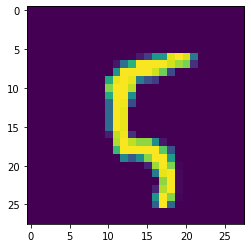

In [ ]:
plt.imshow(x_train[100][:,:,0])
print(y_train[100])

In [ ]:
batch_size = 64
num_classes = 10
epochs = 5

In [ ]:
# model = tf.keras.models.Sequential([
#     tf.keras.layers.Conv2D(32, (5,5), padding='same', activation='relu', input_shape=input_shape),
#     tf.keras.layers.Conv2D(32, (5,5), padding='same', activation='relu'),
#     tf.keras.layers.MaxPool2D(),
#     tf.keras.layers.Dropout(0.25),
#     tf.keras.layers.Conv2D(64, (3,3), padding='same', activation='relu'),
#     tf.keras.layers.Conv2D(64, (3,3), padding='same', activation='relu'),
#     tf.keras.layers.MaxPool2D(strides=(2,2)),
#     tf.keras.layers.Dropout(0.25),
#     tf.keras.layers.Flatten(),
#     tf.keras.layers.Dense(128, activation='relu'),
#     tf.keras.layers.Dropout(0.5),
#     tf.keras.layers.Dense(num_classes, activation='softmax')
# ])

# model.compile(optimizer=tf.keras.optimizers.RMSprop(epsilon=1e-08), loss='sparse_categorical_crossentropy', metrics=['acc'])

In [ ]:
callback_ES = tf.keras.callbacks.EarlyStopping(
    monitor='loss',
    min_delta=0.05,
    patience=2,
    verbose=0,
    mode='auto',
    baseline=None,
    restore_best_weights=False
)
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (2,2), padding='same', activation='relu', input_shape=input_shape),
    tf.keras.layers.MaxPool2D(),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Conv2D(32, (2,2), padding='same', activation='relu'),
    tf.keras.layers.MaxPool2D(strides=(2,2)),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(64, activation='relu',
                          kernel_regularizer=tf.keras.regularizers.L1(0.01),
                          activity_regularizer=tf.keras.regularizers.L2(0.01)),
    tf.keras.layers.Dense(num_classes, activation='softmax')
])

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['acc'])

In [ ]:
# class myCallback(tf.keras.callbacks.Callback):
#   def on_epoch_end(self, epoch, logs={}):
#     if(logs.get('acc')>0.995):
#       print("\nReached 99.5% accuracy so cancelling training!")
#       self.model.stop_training = True

# callbacks = myCallback()

In [ ]:
history = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    validation_split=0.1,
                    callbacks=[callback_ES])

Epoch 1/5
844/844 [==============================] - 45s 52ms/step - loss: 2.5242 - acc: 0.7146 - val_loss: 1.1018 - val_acc: 0.9217
Epoch 2/5
844/844 [==============================] - 43s 51ms/step - loss: 1.2019 - acc: 0.8520 - val_loss: 0.9049 - val_acc: 0.9468
Epoch 3/5
844/844 [==============================] - 42s 50ms/step - loss: 1.0783 - acc: 0.8732 - val_loss: 0.8223 - val_acc: 0.9505
Epoch 4/5
844/844 [==============================] - 43s 50ms/step - loss: 1.0093 - acc: 0.8821 - val_loss: 0.7655 - val_acc: 0.9585
Epoch 5/5
844/844 [==============================] - 43s 51ms/step - loss: 0.9603 - acc: 0.8898 - val_loss: 0.7101 - val_acc: 0.9590


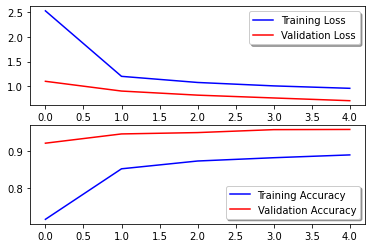

In [ ]:
fig, ax = plt.subplots(2,1)
ax[0].plot(history.history['loss'], color='b', label="Training Loss")
ax[0].plot(history.history['val_loss'], color='r', label="Validation Loss",axes =ax[0])
legend = ax[0].legend(loc='best', shadow=True)

ax[1].plot(history.history['acc'], color='b', label="Training Accuracy")
ax[1].plot(history.history['val_acc'], color='r',label="Validation Accuracy")
legend = ax[1].legend(loc='best', shadow=True)

In [ ]:
test_loss, test_acc = model.evaluate(x_test, y_test)

313/313 [==============================] - 3s 9ms/step - loss: 0.7288 - acc: 0.9520


In [ ]:
model.evaluate(x_test,  y_test, verbose=2)

313/313 - 3s - loss: 0.7288 - acc: 0.9520 - 3s/epoch - 8ms/step


[0.728771448135376, 0.9520000219345093]

In [ ]:
probability_model = tf.keras.Sequential([
  model,
  tf.keras.layers.Softmax()
])

In [ ]:
probability_model(x_test[:5])

<tf.Tensor: shape=(5, 10), dtype=float32, numpy=
array([[0.08537498, 0.0853693 , 0.08542679, 0.0853985 , 0.08536689,
        0.08536705, 0.08536599, 0.23150651, 0.08537112, 0.08545286],
       [0.08814198, 0.08871396, 0.218766  , 0.08653324, 0.08615549,
        0.0861758 , 0.08659188, 0.08622166, 0.08653638, 0.08616359],
       [0.08558453, 0.22875221, 0.085604  , 0.08557267, 0.08609579,
        0.08555382, 0.08573684, 0.08580159, 0.0856708 , 0.08562779],
       [0.23113735, 0.08539553, 0.08550099, 0.08541924, 0.08540007,
        0.08540907, 0.08544323, 0.08545143, 0.08541982, 0.08542323],
       [0.08545797, 0.085449  , 0.08549477, 0.08544683, 0.23025262,
        0.08544593, 0.08558713, 0.08546913, 0.08544923, 0.08594733]],
      dtype=float32)>

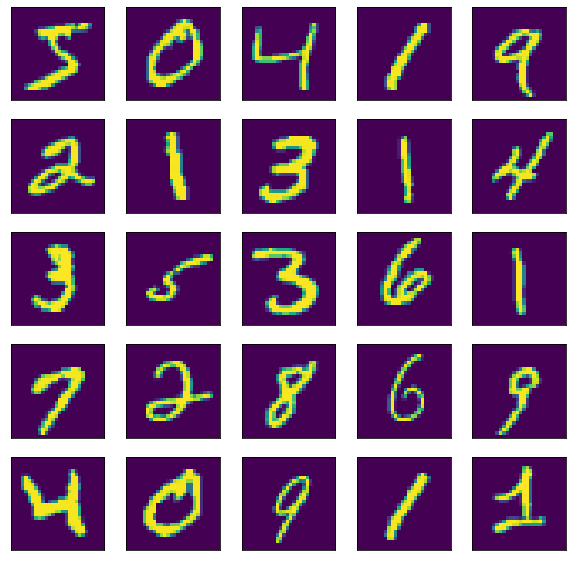

In [ ]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train[i][:,:,0])
plt.show()

In [ ]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 28, 28, 32)        160       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 14, 14, 32)       0         
 2D)                                                             
                                                                 
 dropout_2 (Dropout)         (None, 14, 14, 32)        0         
                                                                 
 conv2d_3 (Conv2D)           (None, 14, 14, 32)        4128      
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 7, 7, 32)         0         
 2D)                                                             
                                                                 
 dropout_3 (Dropout)         (None, 7, 7, 32)         